/tmp/ipykernel_15346/2865434675.py:4: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


edge:  1362863556 1362864528
                    y           x  street_count                    geometry
osmid                                                                      
1362864172  35.358512  137.000963             3  POINT (137.00096 35.35851)
1362864358  35.359080  136.999337             3  POINT (136.99934 35.35908)
1362864371  35.359143  136.998935             3  POINT (136.99893 35.35914)
1362864386  35.359187  136.997543             4  POINT (136.99754 35.35919)
1362864393  35.359227  136.996421             4  POINT (136.99642 35.35923)
1362864528  35.359433  136.994937             3  POINT (136.99494 35.35943)
8315519720  35.359266  136.995438             4  POINT (136.99544 35.35927)
8315519727  35.359145  136.998885             3  POINT (136.99889 35.35914)
11
edge:  1362864528 1362863556
                    y           x  street_count                    geometry
osmid                                                                      
1362864172  35.358512  137.

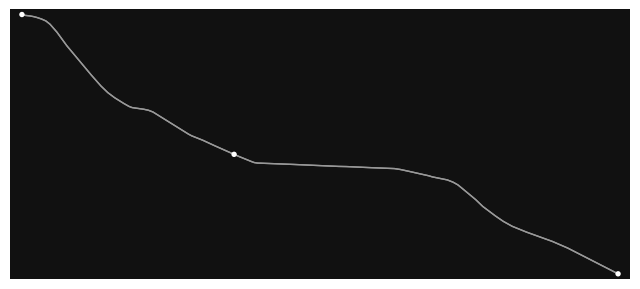

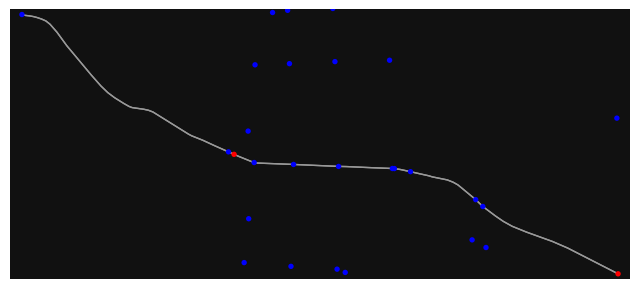

/tmp/ipykernel_15346/2865434675.py:51: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  map = ox.plot_graph_folium(ox.graph_from_gdfs(gdf_nodes, gdf_edges), edge_width=2)


In [15]:
import osmnx as ox
import utils

ox.config(use_cache=True, log_console=True)
g_all = ox.graph_from_point(center_point=(35.361259, 136.998819)
                                , network_type='drive'
                                , dist=1000)

g = ox.graph_from_point(center_point=(35.361259, 136.998819)
                                , network_type='drive'
                                , dist=1000
                                , custom_filter='["highway"~"secondary|secondary_link|primary|primary_link|trunk|trunk_link"]')
all_nodes = ox.graph_to_gdfs(g_all, nodes=True, edges=False)
all_edges = ox.graph_to_gdfs(g_all, nodes=False, edges=True)

gdf_nodes = ox.graph_to_gdfs(g, nodes=True, edges=False)
gdf_edges = ox.graph_to_gdfs(g, nodes=False, edges=True)

# gdf_edges = all_edges

# printを省略させない
for index, row in gdf_edges.iterrows():
  # rowの開始ノードと終了ノードを出力する
  print('edge: ', index[0], index[1])
  # rowジオメトリー内の複数の座標と一致するノードをg_allから取得する
  nodes = all_nodes[all_nodes.geometry.intersects(row.geometry)]
  # 先頭と末尾のノードを削除
  nodes = nodes[1:-1]
  # print(len(nodes))
  if index[0] == 556655640 and index[1] == 556655681:
    # nodes['street_count']の合計を求める
    nodes['street_cnt'] = nodes['street_count'].sum() - (len(nodes) * 2)
    print(nodes)
  # print(nodes)
  all_street_cnt = nodes['street_count'].sum() - (len(nodes) * 2)
  print(nodes)
  print(all_street_cnt)
  # # nodes.street_cntの合計を出力する
  # street_cnt = nodes.street_cnt.sum()
  # print(street_cnt)
  

map_osm = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
ox.plot_graph(map_osm)

# osmidが426741865のノードに色を付けて表示する
map_osm = ox.graph_from_gdfs(all_nodes, gdf_edges)
utils.highlight_node(map_osm, 1362864528, 1362863556)

# gdf_edgesとgdf_nodesを結合して表示する
map = ox.plot_graph_folium(ox.graph_from_gdfs(gdf_nodes, gdf_edges), edge_width=2)
map